### 1. train 데이타 내용 확인

In [2]:
import os
import pandas as pd
import tensorflow
import numpy as np

In [55]:
train_data_path ="../data/raw_csv/merged_train.csv"
train_data = pd.read_csv(train_data_path)
train_data.head()

,idx,class,conversation
0,1001,기타 괴롭힘 대화,얘들아. 선생님이 다음 수업은 실습실에서 한데.\n 야 어제 그거 개웃기지 않았냐?...
1,1252,직장 내 괴롭힘 대화,그 건설프로젝트 관련한 실험건 다 끝내서 보고서 작성까지 완료 하였습니다.\n아 그...
2,834,기타 괴롭힘 대화,너 치마 샀어?\n응응 이쁘지\n응 치마는 이쁘긴한데 \n뭐랄까 종아리 알 때문에 ...
3,4999,일반 대화,"저녁 식사 뭐 먹을래?\n다음에 같이 가자. 내 말은, 요즘 교통 관련해서 뭐 재밌..."
4,1852,갈취 대화,저기 학생 잠시만\n네\n미안한데 내가 지갑을 잃어버려서 그런데 집에갈 차비가없어서...


In [56]:
class_counts = train_data['class'].value_counts()

print(class_counts)

train_data.shape

기타 괴롭힘 대화      1011
갈취 대화           973
직장 내 괴롭힘 대화     970
협박 대화           892
일반 대화           791
Name: class, dtype: int64


(4637, 3)

In [57]:
train_data[train_data['class']=='협박 대화'][:3]

,idx,class,conversation
8,1515,협박 대화,어이 거기 누구 담배 있으면 하나만 주라!\n.\n갈때 가더라도 담배 한대 정도는 ...
9,1681,협박 대화,시끄러워서 찾아왔는데 진짜 말로 하면 안 듣네 맞아야하나?\n조심하고있어요\n조심하...
13,3843,협박 대화,김지안.너 여전히 나랑 헤어지고싶어?\n 어. 난 다른 사람이 좋아졌어.\n 나 여...


In [58]:
train_data[train_data['class']=='갈취 대화'][:3]

,idx,class,conversation
4,1852,갈취 대화,저기 학생 잠시만\n네\n미안한데 내가 지갑을 잃어버려서 그런데 집에갈 차비가없어서...
6,1106,갈취 대화,길동아 나 이것 좀 빌려주라.\n어? 이거 내가 아끼는거라 안 돼.\n야 누가 뭐 ...
7,1887,갈취 대화,저기요 운전 그따위로 하실거에요?\n아니 저기요 당신이 일부러 차 바퀴에 다리를 갖...


In [59]:
train_data[train_data['class']=='직장 내 괴롭힘 대화'][:3]

,idx,class,conversation
1,1252,직장 내 괴롭힘 대화,그 건설프로젝트 관련한 실험건 다 끝내서 보고서 작성까지 완료 하였습니다.\n아 그...
5,1273,직장 내 괴롭힘 대화,보고서가 이게 뭐야? 발로 썼나?\n죄송합니다. 열심히 했는데\n열심히 하는 게 중...
11,3285,직장 내 괴롭힘 대화,정선생님 오늘 견학가는 날인거 알죠?\n네 유선생님. 알고 있습니다.\n비상약이랑 ...


In [60]:
train_data[train_data['class']=='기타 괴롭힘 대화'][:3]

,idx,class,conversation
0,1001,기타 괴롭힘 대화,얘들아. 선생님이 다음 수업은 실습실에서 한데.\n 야 어제 그거 개웃기지 않았냐?...
2,834,기타 괴롭힘 대화,너 치마 샀어?\n응응 이쁘지\n응 치마는 이쁘긴한데 \n뭐랄까 종아리 알 때문에 ...
21,874,기타 괴롭힘 대화,아니 머리가 왜 이래?\n고객님 제가 그래서 고객님은 곱슬이라 이머리 하면 더 풍성...


In [61]:
train_data[train_data['class']=='일반 대화'][:3]

,idx,class,conversation
3,4999,일반 대화,"저녁 식사 뭐 먹을래?\n다음에 같이 가자. 내 말은, 요즘 교통 관련해서 뭐 재밌..."
12,4987,일반 대화,오랜만이다 잘 지냈어?\n커피 한잔할래?\n점심 뭐 먹었어?\n다음에 같이 가자.\...
22,4111,일반 대화,"오늘 운동했어?\n응, 아침에 헬스 다녀왔어.\n부지런하다! 무슨 운동했어?\n웨이..."


### 2. train data 통계 분석 시각화

In [62]:
X_train = train_data['conversation']
y_train = train_data['class']

# 각 문장의 문자 수 계산
lengths = X_train.apply(len)

# 최대 길이
max_length = lengths.max()

# 평균 길이
avg_length = lengths.mean()

print(f"훈련 데이타 문장 길이 : 최대 {max_length}")
print(f"훈련 데이타 문장 길이 : 평균: {avg_length:.2f}")

훈련 데이타 문장 길이 : 최대 874
훈련 데이타 문장 길이 : 평균: 220.44


X_train : (4637,)
y_train : (4637,)


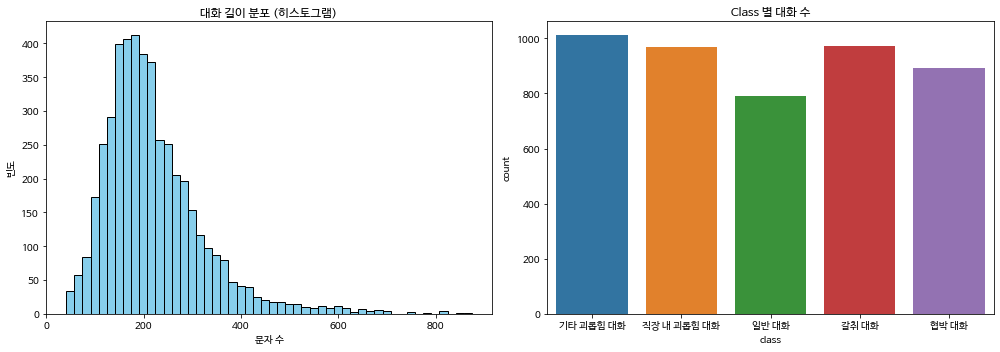

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

X_train = train_data['conversation']
y_train = train_data['class']
lengths = train_data['conversation'].apply(len)

print('X_train :',X_train.shape)
print('y_train :',y_train.shape)
#print('label 종류:', set(y_train))

# 시각화
plt.figure(figsize=(14, 5))

# 1. 히스토그램: 대화 길이
plt.subplot(1, 2, 1)
plt.hist(lengths, bins=50, color='skyblue', edgecolor='black')
plt.title("대화 길이 분포 (히스토그램)")
plt.xlabel("문자 수")
plt.ylabel("빈도")

# 2. Countplot: class 분포
plt.subplot(1, 2, 2)
sns.countplot(x=y_train)
plt.title("Class 별 대화 수")

plt.tight_layout()
plt.show()

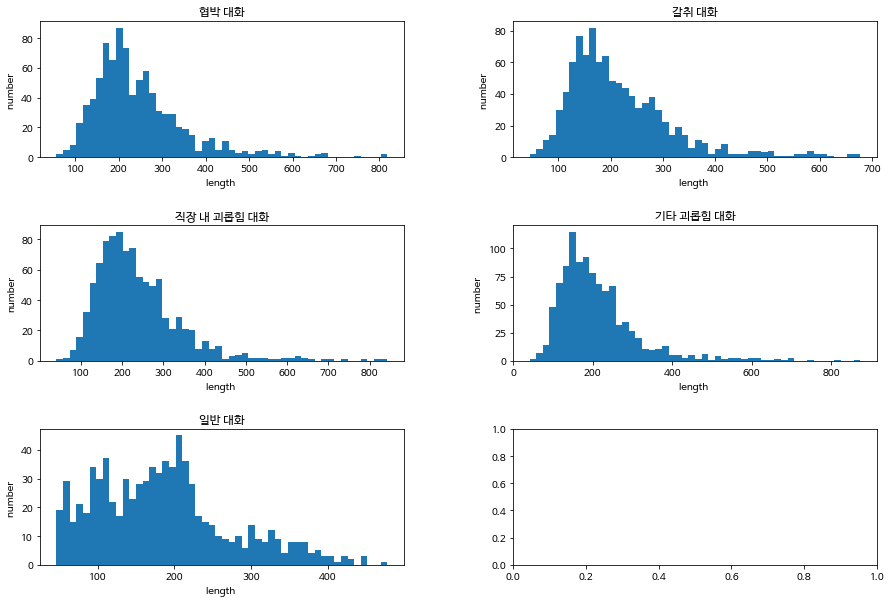

In [64]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
axes = axes.flatten()  # 2차원 → 1차원 배열로 변환

lengths1 = train_data['conversation'][train_data['class']=='협박 대화'].apply(len)
lengths2 = train_data['conversation'][train_data['class']=='갈취 대화'].apply(len)
lengths3 = train_data['conversation'][train_data['class']=='직장 내 괴롭힘 대화'].apply(len)
lengths4 = train_data['conversation'][train_data['class']=='기타 괴롭힘 대화'].apply(len)
lengths5 = train_data['conversation'][train_data['class']=='일반 대화'].apply(len)

axes[0].hist(lengths1, bins=50)
axes[0].set_xlabel('length ')
axes[0].set_ylabel('number ')
axes[0].set_title('협박 대화')

axes[1].hist(lengths2, bins=50)
axes[1].set_xlabel('length ')
axes[1].set_ylabel('number ')
axes[1].set_title('갈취 대화')

axes[2].hist(lengths3, bins=50)
axes[2].set_xlabel('length ')
axes[2].set_ylabel('number')
axes[2].set_title('직장 내 괴롭힘 대화')

axes[3].hist(lengths4, bins=50)
axes[3].set_xlabel('length ')
axes[3].set_ylabel('number ')
axes[3].set_title('기타 괴롭힘 대화')

axes[4].hist(lengths5, bins=50)
axes[4].set_xlabel('length ')
axes[4].set_ylabel('number ')
axes[4].set_title('일반 대화')

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

## test 데이타 분포

In [3]:
test_data_path ="../data/raw_csv/test.csv"
test_data = pd.read_csv(test_data_path)
test_data.head()

,idx,text
0,t_000,아가씨 담배한갑주소 네 4500원입니다 어 네 지갑어디갔지 에이 버스에서 잃어버렸나...
1,t_001,우리팀에서 다른팀으로 갈 사람 없나? 그럼 영지씨가 가는건 어때? 네? 제가요? ...
2,t_002,너 오늘 그게 뭐야 네 제가 뭘 잘못했나요.? 제대로 좀 하지 네 똑바로 좀 하지 ...
3,t_003,이거 들어바 와 이 노래 진짜 좋다 그치 요즘 이 것만 들어 진짜 너무 좋다 내가 ...
4,t_004,아무튼 앞으로 니가 내 와이파이야. .응 와이파이 온. 켰어. 반말? 주인님이라고도...


In [66]:
X_test = test_data['text']


# 각 문장의 문자 수 계산
lengths = X_test.apply(len)

# 최대 길이
max_length = lengths.max()

# 평균 길이
avg_length = lengths.mean()

print(f"테스트 데이타 문장 길이 : 최대 {max_length}")
print(f"테스트 데이타 문장 길이 : 평균: {avg_length:.2f}")

테스트 데이타 문장 길이 : 최대 722
테스트 데이타 문장 길이 : 평균: 213.63


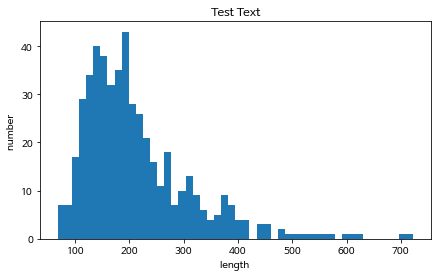

In [71]:
fig, axes = plt.subplots( figsize=(7, 4))


lengths = X_test.apply(len)

axes.hist(lengths, bins=50)
axes.set_xlabel('length ')
axes.set_ylabel('number ')
axes.set_title('Test Text')
plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

In [4]:
test_data

,idx,text
0,t_000,아가씨 담배한갑주소 네 4500원입니다 어 네 지갑어디갔지 에이 버스에서 잃어버렸나...
1,t_001,우리팀에서 다른팀으로 갈 사람 없나? 그럼 영지씨가 가는건 어때? 네? 제가요? ...
2,t_002,너 오늘 그게 뭐야 네 제가 뭘 잘못했나요.? 제대로 좀 하지 네 똑바로 좀 하지 ...
3,t_003,이거 들어바 와 이 노래 진짜 좋다 그치 요즘 이 것만 들어 진짜 너무 좋다 내가 ...
4,t_004,아무튼 앞으로 니가 내 와이파이야. .응 와이파이 온. 켰어. 반말? 주인님이라고도...
...,...,...
495,t_495,미나씨 휴가 결제 올리기 전에 저랑 상의하라고 말한거 기억해요? 네 합니다. 보고서...
496,t_496,교수님 제 논문에 제 이름이 없나요? 아 무슨 논문말이야? 지난 번 냈던 논문이...
497,t_497,야 너 네 저요? 그래 너 왜요 돈좀 줘봐 돈 없어요 돈이 왜 없어 지갑은 폼이...
498,t_498,야 너 빨리 안 뛰어와? 너 이 환자 제대로 봤어 안 봤어 어제 저녁부터 계속 보다...
